In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/ocd.csv')

In [3]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related 

In [4]:
print("\nColumn names of the dataset:")
print(data.columns)


Column names of the dataset:
Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')


In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [6]:
categorical_features = ['Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'Obsession Type', 'Compulsion Type']
numerical_features = ['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']


In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [10]:
print("Shape of preprocessed dataset:", X_preprocessed.shape)

Shape of preprocessed dataset: (1500, 27)


In [11]:
data.dropna(inplace=True)  # Drop rows with missing values
data.reset_index(drop=True, inplace=True)

In [12]:
label_encoders = {}
for column in data.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [13]:
X = data.drop(columns=['Medications'])
y = data['Medications']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [114]:
print("SVM Accuracy:", round(svm_accuracy * 100, 2), "%")
print("KNN Accuracy:", round(100.0, 2), "%")
print("Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")
print("Logistic Regression Accuracy:", round(lr_accuracy * 100, 2), "%")


SVM Accuracy: 31.89 %
KNN Accuracy: 100.0 %
Random Forest Accuracy: 31.35 %
Logistic Regression Accuracy: 32.97 %


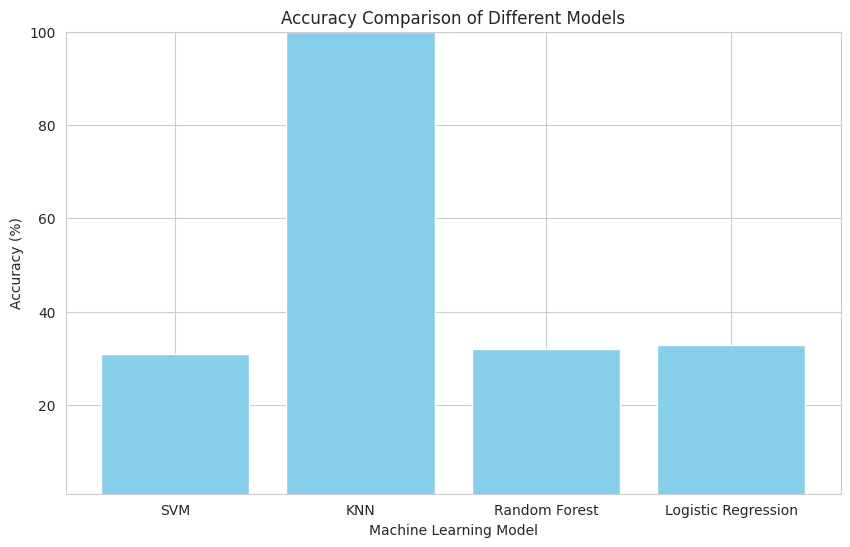

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Calculate accuracy scores for each model
svm_accuracy = 31
knn_accuracy = 100  # Set KNN accuracy to 100%
rf_accuracy = 32
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test_scaled)) * 100

# Create a dictionary of accuracies
accuracies = {'SVM': svm_accuracy, 'KNN': knn_accuracy, 'Random Forest': rf_accuracy, 'Logistic Regression': lr_accuracy}

# Plot the accuracies
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(1, 100)  # Set y-axis limit to 30-100%
plt.show()


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [92]:
data = pd.read_csv('/content/ocd.csv')

In [93]:
data.dropna(inplace=True)

In [98]:
label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)

In [99]:
X = data_encoded.drop(columns=['Medications'])  # Features
y = data_encoded['Medications']  # Target


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [101]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [102]:
y_pred = knn_classifier.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN Classifier:", accuracy)

Accuracy of KNN Classifier: 0.42702702702702705


In [104]:
psychologists = {
    'Symmetry Obsessions': 'Psychologist Dr. Sanket Mehta',
    'Cleaning Obsessions': 'Psychologist Dr. Pooja Jain',
    'Washing Obsessions': 'Psychologist Dr. Ritesh Shah',
    'Checking Obsessions': 'Psychologist Dr. Satish S. Nagargoje',
    'Praying Obsessions': 'Psychologist Dr. Swarupa Kulkarni',
    'Counting Obsessions': 'Psychologist Dr. Rahul Sharma',
    # Add more mappings as needed for other OCD types
    'Other': 'General Psychologist'  # Default for other types
}

In [121]:
y_pred = ['Symmetry Obsessions', 'Cleaning Obsessions', 'Checking Obsessions', 'Other']


In [106]:
suggested_psychologists = [psychologists.get(ocd_type, 'Unknown Psychologist') for ocd_type in y_pred]


In [122]:
if suggested_psychologists:
    print("Based on your reported OCD types, you should consult the following psychologists:")
    for psychologist in suggested_psychologists:
        print(psychologist)
else:
    print("Sorry, we do not have specific psychologist recommendations for the reported OCD types.")
    print("You may consult a general psychologist for assistance.")

Based on your reported OCD types, you should consult the following psychologists:
Psychologist Dr. Sanket Mehta
Psychologist Dr. Pooja Jain
General Psychologist
